<a href="https://colab.research.google.com/github/FS-Tamim/City-Life-Cycle-Open-GL-project/blob/main/final_EDA_nonhostile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [206]:
dataset_Name='/content/drive/MyDrive/Colab Notebooks/Thesis/Hostility_dataset - nonhostile.csv'
# dataset_Name='/content/drive/MyDrive/Colab Notebooks/Thesis/Hostility_dataset - Hostility_Dataset_main_suffeld.csv'
df = pd.read_csv(dataset_Name)
df=df.dropna()
df.head()


,id,Text,non-hostile,offensive,Hate speech,threat,defamation,sarcasm
0,1,শেষ বয়শেই আসল চরিত্র ফুটে উটেছে,0,1,0,0,1,1
1,2,"ছি ছি এগুলু কারা ঠিক না,,,",0,0,1,0,0,1
2,3,"বিয়ে নামের নাটক যেমন ঢোল পিটিয়ে করে,আবার ডিভোর...",0,1,0,0,1,0
3,4,"বাংলাদেশের মিডিয়া বিশ্বাসযোগ্য না, বিশেষ করে ব...",0,0,1,0,1,0
4,5,পেশাদারিত্বের দক্ষতার অভাব আর চাটুকারিতার পারদ...,0,0,1,0,1,0


In [207]:
print( df.dtypes)

id              int64
Text           object
non-hostile     int64
offensive       int64
Hate speech     int64
threat          int64
defamation      int64
sarcasm         int64
dtype: object


In [208]:
df.isnull().values.any()

False

In [209]:
print("Total number of Text extracted from dataset are =",len(df))

Total number of Text extracted from dataset are = 10535


In [210]:
print('Average Text length: ', df.Text.str.split().str.len().mean())
print('Stdev Text length: ', df.Text.str.split().str.len().std())

Average Text length:  13.081632653061224
Stdev Text length:  12.06609462276215


In [211]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [212]:
df

,id,Text,non-hostile,offensive,Hate speech,threat,defamation,sarcasm
0,1,শেষ বয়শেই আসল চরিত্র ফুটে উটেছে,0,1,0,0,1,1
1,2,"ছি ছি এগুলু কারা ঠিক না,,,",0,0,1,0,0,1
2,3,"বিয়ে নামের নাটক যেমন ঢোল পিটিয়ে করে,আবার ডিভোর...",0,1,0,0,1,0
3,4,"বাংলাদেশের মিডিয়া বিশ্বাসযোগ্য না, বিশেষ করে ব...",0,0,1,0,1,0
4,5,পেশাদারিত্বের দক্ষতার অভাব আর চাটুকারিতার পারদ...,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
10532,10532,", ইয়া রব্ব কাফনের কাপড় পড়ানোর আগে একদিন ইহর...",1,0,0,0,0,0
10533,10533,"মানুষ কোনদিন অপরাধী হয় না , অপরাধী হয় মানুষে...",1,0,0,0,0,0
10534,10534,কাউকে কি ভালোবাসো ? হুম একজনকে । কে সে ? যে আম...,1,0,0,0,0,0
10535,10535,নিজেকে কখনো অপদার্থ ভেবে থামিয়ে রেখো না ! কার...,1,0,0,0,0,0


In [213]:
with open(dataset_Name, 'r') as f:
    contents = f.read()
    words = contents.split()
    num_words = len(words)
print("Total number of words in the dataset:", num_words)

with open(dataset_Name, 'r') as f:
    contents = f.read()
    words = contents.split()
    unique_words = set(words)
    num_unique_words = len(unique_words)
print("Total number of unique words in the dataset:", num_unique_words)

import os
size_bytes = os.path.getsize(dataset_Name)
size_mb = size_bytes / (1024 * 1024)
print("Size of the dataset in MB:", size_mb)


Total number of words in the dataset: 138198
Total number of unique words in the dataset: 42652
Size of the dataset in MB: 2.15297794342041


In [214]:
cols = df.columns
cols = list(df.columns)
classes = cols[2:8]
num_labels = len(classes)
print('Mesh Labels Root Class: "\n"',classes)
print("\n")
print('Number of Labels: ' ,num_labels)

Mesh Labels Root Class: "
" ['non-hostile', 'offensive', 'Hate speech', 'threat', 'defamation', 'sarcasm']


Number of Labels:  6


**Dataset Statistics**


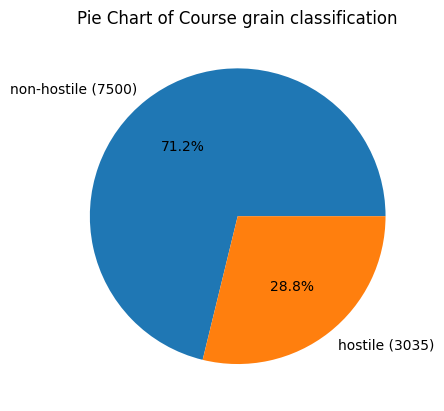

In [217]:
import matplotlib.pyplot as plt

# Select the column for which you want to create a pie chart
column_data = df['non-hostile']

# Replace the labels
label_map = {1: 'hostile', 0: 'non-hostile'}
column_data = column_data.map(label_map)

# Count the frequency of each value in the column
value_counts = column_data.value_counts()

# Create a list of labels with count values
labels = []
for label in value_counts.index:
    count = value_counts[label]
    label_text = f'{label} ({count})'
    labels.append(label_text)

# Create a pie chart with custom labels
plt.pie(value_counts, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Pie Chart of Course grain classification')

# Display the chart
plt.show()

In [218]:
def single_class_post_distribution(dataset,classes):
  number_of_comments = []
  for labels in classes:
    number_of_comments.append((labels, dataset[labels].sum()))
  stats = pd.DataFrame(number_of_comments,columns = ['class','number of text'])
  return stats

In [219]:
stats = single_class_post_distribution(df,classes)
stats

,class,number of text
0,non-hostile,3035
1,offensive,3530
2,Hate speech,2550
3,threat,1445
4,defamation,2355
5,sarcasm,2166


Text(0.5, 0, 'Classes')

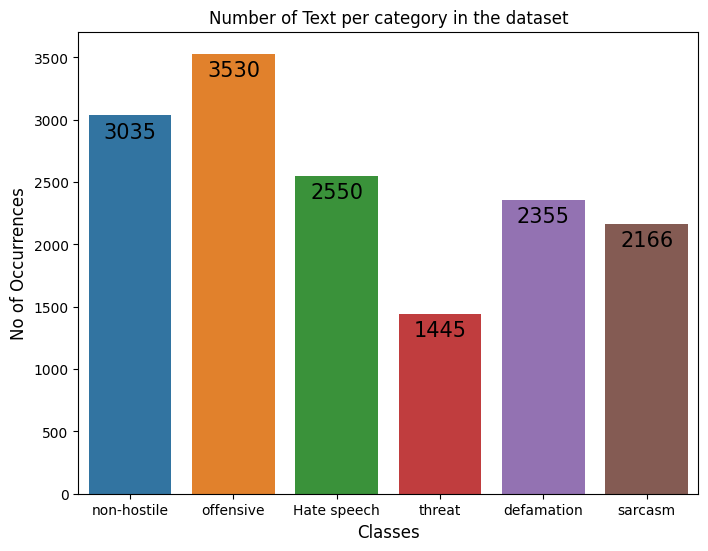

In [220]:
# Barplot
import seaborn as sns
plt.figure(figsize=(8,6))
splot = sns.barplot(x = 'class',y = 'number of text',data = stats)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title("Number of Text per category in the dataset")
plt.ylabel('No of Occurrences', fontsize=12)
plt.xlabel('Classes', fontsize=12)

In [221]:
labelss = cols[3:8]
def single_class_post_distribution(dataset,classes):
  number_of_comments = []
  for labels in labelss:
    number_of_comments.append((labels, dataset[labels].sum()))
  stats = pd.DataFrame(number_of_comments,columns = ['class','number of text'])
  return stats

stats = single_class_post_distribution(df,classes)
# stats['key3'] = 'value3'

# Append the new dictionary element to the list
stats.loc[5,'class'] = 'Non-hostile'
stats.loc[5,'number of text'] = 3035

stats
print(type(stats))


<class 'pandas.core.frame.DataFrame'>


In [222]:
stats

,class,number of text
0,offensive,3530.0
1,Hate speech,2550.0
2,threat,1445.0
3,defamation,2355.0
4,sarcasm,2166.0
5,Non-hostile,3035.0


Text(0.5, 0, 'Classes')

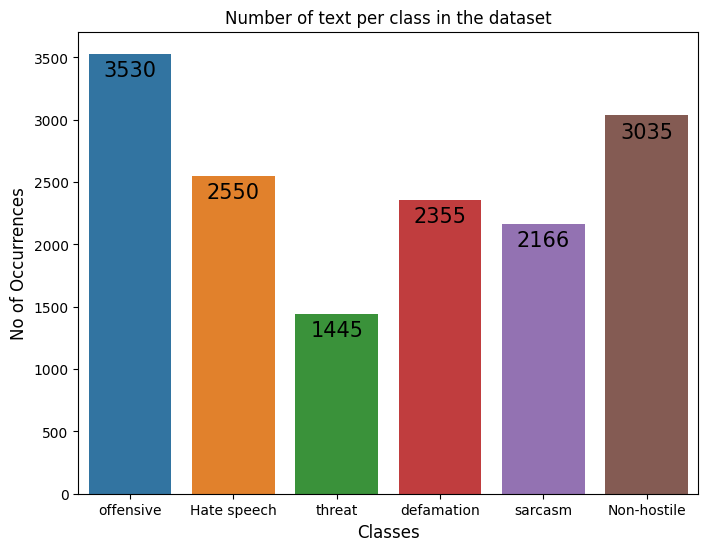

In [223]:
# Barplot
import seaborn as sns
plt.figure(figsize=(8,6))
splot = sns.barplot(x = 'class',y = 'number of text',data = stats)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title("Number of text per class in the dataset")
plt.ylabel('No of Occurrences', fontsize=12)
plt.xlabel('Classes', fontsize=12)

**How many posts have multiple category ?**


In [234]:

def posts_with_multilabel (dataset,label):
  rowsums = dataset.iloc[:,2:8].sum(axis=1)
  x=rowsums.value_counts()
  df = pd.DataFrame(x.values,columns = ['number_of_posts'])
  #plot
  plt.figure(figsize=(8,6))
  splot = sns.barplot(x = df.index, y= 'number_of_posts',data = df)
  for p in splot.patches:
      splot.annotate(format(p.get_height(), '1.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
  plt.title(f"Multiple class per post ({label} Set)")
  plt.ylabel('No of Occurrences', fontsize=12)
  plt.xlabel('No of classes', fontsize=12)



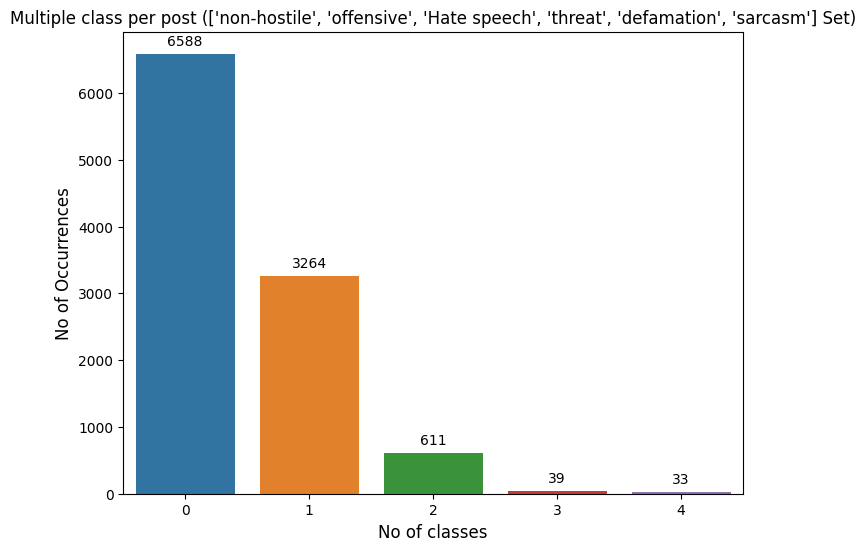

In [239]:
posts_with_multilabel (df,classes)

**Number of comments classified as classes depending on their lengths**

In [246]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['non-hostile', 'offensive', 'Hate speech', 'threat', 'defamation', 'sarcasm']]
  label = label.values
  comment = dataset['Text']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix])
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
      if label[ix][2] :
          y[ix][2] = l
      if label[ix][3] :
          y[ix][3] = l
      if label[ix][4] :
          y[ix][4] = l
      if label[ix][5] :
          y[ix][5] = l

  labelsplt = classes
  color = ['green','red','blue','yellow','chartreuse','orange']    
  bins = [1,50,100,150,200,250,300,350,400,450,500,550,600]    
  plt.title (f'Comments Length Per Class ({set_name} Set)')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 450, 0, 1700])
  plt.xlabel('Length of Text')
  plt.ylabel('Number of Text') 
  plt.legend()
  plt.grid(True)
  plt.show()

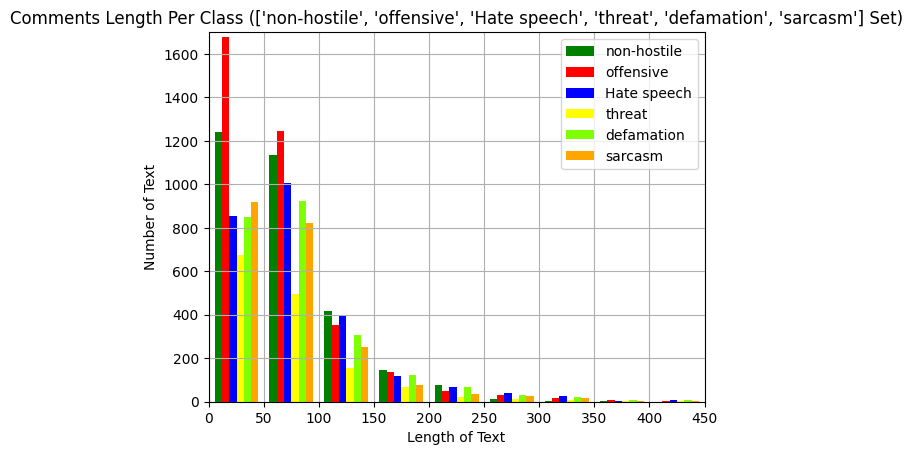

In [247]:
comments_length_per_class(df,classes)

In [250]:
import numpy as np
import matplotlib.pyplot as plt

def comments_length_binary(dataset, set_name):
    # Get the labels and comments from the dataset
    labels = dataset['Hostile/Non-Hostile']
    comments = dataset['Text']
    
    # Create empty arrays to store the length of comments for each class
    non_hostile_lengths = []
    hostile_lengths = []
    
    # Iterate over all comments and their labels
    for comment, label in zip(comments, labels):
        # Calculate the length of the comment
        length = len(comment)
        
        # Append the length to the appropriate array based on the label
        if label == 0:
            non_hostile_lengths.append(length)
        else:
            hostile_lengths.append(length)
    
    # Create the histogram with 20 bins
    num_bins =[1,50,100,150,200,250,300,350,400,450,500,550,600]   
    plt.hist([ hostile_lengths,non_hostile_lengths], bins=num_bins, color=['blue', 'red'], label=['Non-Hostile', 'Hostile'])
    
    # Set the x-axis and y-axis labels, and the title of the plot
    plt.xlabel('Text Length')
    plt.ylabel('Number of Text')
    plt.title(f'Comment Lengths for Binary Classification ({set_name} set)')
    
    plt.axis([0, 500, 0, 4500])
    
    # Add a legend and grid to the plot, and show it
    plt.legend()
    plt.grid(True)
    plt.show()


In [251]:
# label=['Hostile/Non-Hostile']
# comments_length_binary(df,label )

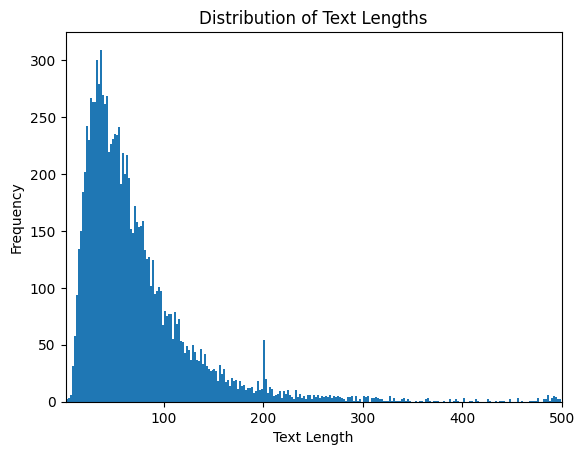

In [252]:
import matplotlib.pyplot as plt

# Calculate the length of each text in a column
text_lengths = df['Text'].apply(len)

# Set the number of bins to 500
num_bins = 1000



# Determine the range of text lengths
max_length = text_lengths.max()
min_length = text_lengths.min()

# Calculate the bin width
bin_width = (max_length - min_length) / num_bins

# Create a histogram of text lengths with 500 bins
plt.hist(text_lengths, bins=num_bins)
plt.xlim(1, 500)

# Add labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')

# Display the chart
plt.show()


In [253]:
stp_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/bd_stopword.txt'
stp = open(stp_path,'r',encoding='utf-8').read().split()

In [254]:
'''
Text Cleaning
'''
from bs4 import BeautifulSoup
import re,nltk,json
import string, spacy,unicodedata, random
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
def text_cleaning(row):
   #to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  # post = re.sub(r'[^\x00-\x7F]+|[\W]', '', text)
  post = post.replace('—', ' ') 
  post = post.replace('।', ' ')
  text = ''.join([c for c in post if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # # Stopword 
  # result = text.split()
  # text = [word.strip() for word in result if word not in stp ]
  # text =" ".join(text)
  
  return text

In [255]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



In [256]:

#Removing punctuations

df['cleaned'] = df['Text'].apply(remove_emojis)
df['cleaned'] = df['Text'].apply(text_cleaning)

## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(100):
  print("Original Data:===\n",df.Text[i],"\nCleaned Data:===\n",df.cleaned[i],)

<ipython-input-254-d33acfc8d95a>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(row, 'html.parser').get_text()


Data samples after cleaning:

Original Data:===
 শেষ বয়শেই আসল চরিত্র ফুটে উটেছে 
Cleaned Data:===
 শেষ বয়শেই আসল চরিত্র ফুটে উটেছে
Original Data:===
 ছি ছি এগুলু কারা ঠিক না,,, 
Cleaned Data:===
 ছি ছি এগুলু কারা ঠিক না
Original Data:===
 বিয়ে নামের নাটক যেমন ঢোল পিটিয়ে করে,আবার ডিভোর্স এর নাটক ও ঢোল পিটিয়ে দেয়,কি মানসিকতা এদের, 
Cleaned Data:===
 বিয়ে নামের নাটক যেমন ঢোল পিটিয়ে করেআবার ডিভোর্স এর নাটক ও ঢোল পিটিয়ে দেয়কি মানসিকতা এদের
Original Data:===
 বাংলাদেশের মিডিয়া বিশ্বাসযোগ্য না, বিশেষ করে বর্তমান সময়ে 
Cleaned Data:===
 বাংলাদেশের মিডিয়া বিশ্বাসযোগ্য না বিশেষ করে বর্তমান সময়ে
Original Data:===
 পেশাদারিত্বের দক্ষতার অভাব আর চাটুকারিতার পারদর্শিতা। 
Cleaned Data:===
 পেশাদারিত্বের দক্ষতার অভাব আর চাটুকারিতার পারদর্শিতা
Original Data:===
 দিনে অন্তত একবার তোমার মুখে হাগিতে চাই আমি!! যতবার মনে করি তোমার ঐ ভক্সদ মার্কা চেহারা!! 
Cleaned Data:===
 দিনে অন্তত একবার তোমার মুখে হাগিতে চাই আমি যতবার মনে করি তোমার ঐ ভক্সদ মার্কা চেহারা
Original Data:===
 শাকিব ও বুবলি একদম প্রথম শ্রেণী

In [261]:
## Individual tweets length calculation
def char_length(row):
    return len(row.split())

labels = ['non-hostile', 'offensive', 'Hate speech', 'threat', 'defamation', 'sarcasm']
# Count number of unique words in each set
def dataset_statistics(dataset):
    for l in labels:
        word_list = [word.strip() for t in list(dataset.loc[dataset[l] == 1, 'cleaned']) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
            counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        print(f"\nClass Name:--> {l} ") 
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Maximum Caption length: {}".format(max(dataset.loc[dataset[l] == 1, 'cleaned'].apply(char_length))))
        print("Minimum Caption length: {}".format(min(dataset.loc[dataset[l] == 1, 'cleaned'].apply(char_length))))
        print("Average Words in texts: {}".format(np.mean(dataset.loc[dataset[l] == 1, 'cleaned'].apply(char_length))))
        print(color.BOLD+"\nMost Frequent Words:\n"+color.END)
        for k,v in ordered[:100]:
            print("{}   {}".format(k,v))


In [262]:
df

,id,Text,non-hostile,offensive,Hate speech,threat,defamation,sarcasm,cleaned
0,1,শেষ বয়শেই আসল চরিত্র ফুটে উটেছে,0,1,0,0,1,1,শেষ বয়শেই আসল চরিত্র ফুটে উটেছে
1,2,"ছি ছি এগুলু কারা ঠিক না,,,",0,0,1,0,0,1,ছি ছি এগুলু কারা ঠিক না
2,3,"বিয়ে নামের নাটক যেমন ঢোল পিটিয়ে করে,আবার ডিভোর...",0,1,0,0,1,0,বিয়ে নামের নাটক যেমন ঢোল পিটিয়ে করেআবার ডিভোর্...
3,4,"বাংলাদেশের মিডিয়া বিশ্বাসযোগ্য না, বিশেষ করে ব...",0,0,1,0,1,0,বাংলাদেশের মিডিয়া বিশ্বাসযোগ্য না বিশেষ করে বর...
4,5,পেশাদারিত্বের দক্ষতার অভাব আর চাটুকারিতার পারদ...,0,0,1,0,1,0,পেশাদারিত্বের দক্ষতার অভাব আর চাটুকারিতার পারদ...
...,...,...,...,...,...,...,...,...,...
10532,10532,", ইয়া রব্ব কাফনের কাপড় পড়ানোর আগে একদিন ইহর...",1,0,0,0,0,0,ইয়া রব্ব কাফনের কাপড় পড়ানোর আগে একদিন ইহরাম...
10533,10533,"মানুষ কোনদিন অপরাধী হয় না , অপরাধী হয় মানুষে...",1,0,0,0,0,0,মানুষ কোনদিন অপরাধী হয় না অপরাধী হয় মানুষের ...
10534,10534,কাউকে কি ভালোবাসো ? হুম একজনকে । কে সে ? যে আম...,1,0,0,0,0,0,কাউকে কি ভালোবাসো হুম একজনকে কে সে যে আমাকে পৃ...
10535,10535,নিজেকে কখনো অপদার্থ ভেবে থামিয়ে রেখো না ! কার...,1,0,0,0,0,0,নিজেকে কখনো অপদার্থ ভেবে থামিয়ে রেখো না কারণ ...


In [263]:
df['cleaned'].isnull().values.any()

False

In [264]:
dataset_statistics(df)


Class Name:--> non-hostile 
Number of Words:37441
Number of Unique Words:8780
Maximum Caption length: 123
Minimum Caption length: 1
Average Words in texts: 12.336408566721582

Most Frequent Words:

ভালো   526
অনেক   521
ভাই   361
এই   327
না   310
আমার   270
জন্য   268
আমি   265
অসাধারণ   252
আপনার   250
সুন্দর   248
আর   243
করে   239
খুব   233
একটা   223
কথা   219
ও   199
ধন্যবাদ   194
দেখে   180
আমাদের   171
থেকে   171
বাংলা   167
মানুষ   162
ভিডিও   157
মনে   141
কিছু   136
সিনেমা   136
যে   129
কে   129
টা   128
এর   126
গান   121
এবং   119
আল্লাহ   117
সব   117
হবে   116
লাগলো   111
একজন   108
এক   107
তার   107
কি   106
করি   104
তোমার   100
আপনাকে   98
আছে   95
আপনি   93
️   92
সাথে   92
লাগে   89
এমন   88
ভাইয়া   87
অভিনয়   87
গুলো   85
কিন্তু   85
দিন   84
নাটক   84
মন   83
হয়ে   80
ভালোবাসা   80
সত্যি   79
পর   79
মুভি   79
ভাল   78
আমরা   77
বেশি   75
বাংলাদেশ   75
হলে   74
ট্রেইলার   74
হয়   73
বাংলাদেশের   73
এত   71
করতে   71
স্যার   71
রাফি   71
এটা   70
সেই   70
কোন  

**Zipf Curve(Frequency vs Rank)**

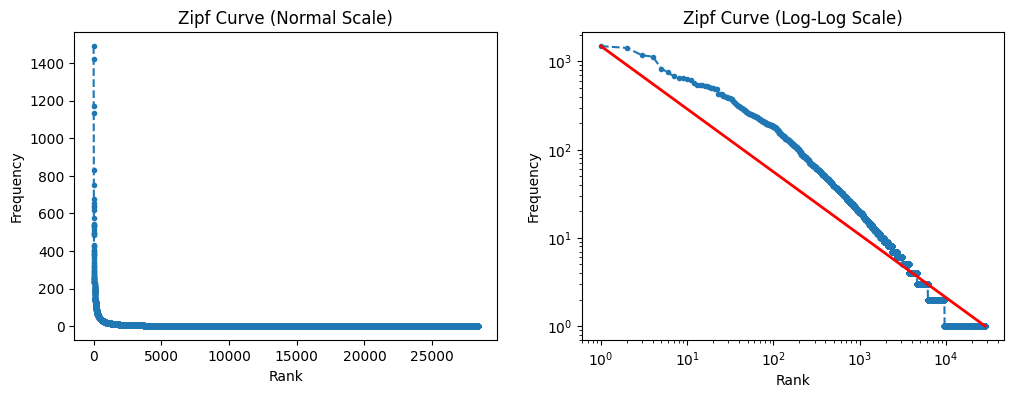

In [265]:
import matplotlib.pyplot as plt

# Calculate the word frequencies
word_counts = df['Text'].str.split(expand=True).stack().value_counts()

# Get the ranks
ranks = range(1, len(word_counts)+1)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the Zipf curve on a normal scale
axs[0].plot(ranks, word_counts ,marker='o', linestyle='--', markersize=3)
axs[0].set_xlabel('Rank')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Zipf Curve (Normal Scale)')

# Plot the Zipf curve on a log-log scale
axs[1].loglog(ranks, word_counts,marker='o', linestyle='--', markersize=3)
axs[1].set_xlabel('Rank')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Zipf Curve (Log-Log Scale)')

max_x = max(ranks)
max_y = max(word_counts)
axs[1].plot([1, max_x], [max_y, 1], 'r', linewidth=2)

# Display the chart
plt.show()


**Word Density Vs average Density**


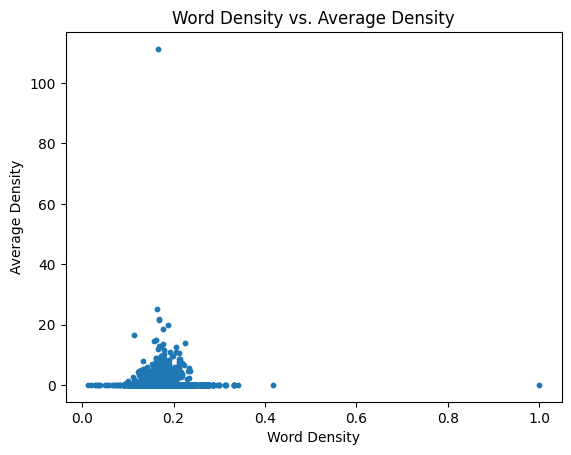

In [266]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the word density and average density for each row
df['Word Density'] = df['Text'].apply(lambda x: len(x.split()) / len(x) if len(x)>0 else 0)
df['Average Density'] = df['Text'].apply(lambda x: len(x.split()) / len(x.split('.')) if len(x)>0 and '.' in x else 0)

# Create a scatter plot of the data
plt.scatter(df['Word Density'], df['Average Density'], s=10)

# Add labels and title
plt.xlabel('Word Density')
plt.ylabel('Average Density')
plt.title('Word Density vs. Average Density')

# Display the plot
plt.show()

**Class wise density vs average density**

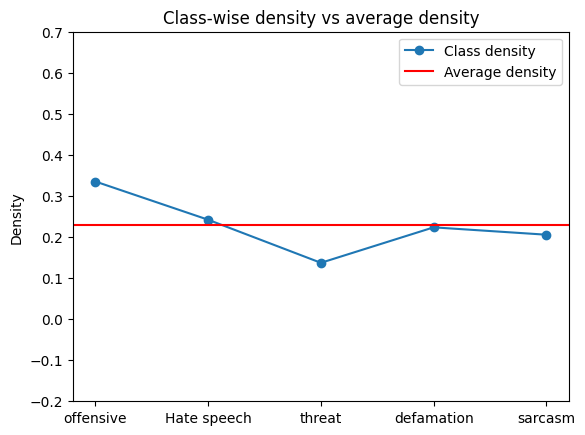

In [267]:
import pandas as pd
import numpy as np

# Load the dataset into a pandas dataframe


# Get the labels and the text data
labels = df.iloc[:, 3:8].values
text_data = df.iloc[:, 0].values

# Create a binary matrix Y where each row represents a sample and each column represents a class
Y = np.zeros((labels.shape[0], labels.shape[1]), dtype=int)
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        if labels[i,j] == 1:
            Y[i,j] = 1

# Compute the density of each class
class_densities = np.sum(Y, axis=0) / Y.shape[0]

# Compute the average density
avg_density = np.mean(class_densities)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(range(5), class_densities, '-o', label='Class density')
# plt.bar(range(6), class_densities)
plt.axhline(y=avg_density, color='r', label='Average density')
plt.xticks(range(5), ['offensive', 'Hate speech', 'threat', 'defamation', 'sarcasm'])
plt.ylabel('Density')
plt.ylim(-.2, .7)
plt.title('Class-wise density vs average density')
plt.legend()
plt.show()


**Calculate Jaccard similarity index for the multi-label dataset**

In [268]:
import numpy as np

# Load the dataset into a pandas dataframe
# Assumes the labels are in columns 2-7 and the text data is in column 0
# Replace this with your own code to load the dataset

# Get the labels and the text data
labels = df.iloc[:, 2:8].values
text_data = df.iloc[:, 1].values.astype(str)

# Create a binary matrix Y where each row represents a sample and each column represents a class
Y = np.zeros((labels.shape[0], labels.shape[1]), dtype=int)
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        if labels[i,j] == 1:
            Y[i,j] = 1

# Count number of unique words in each label
final_list = []

for j in range(Y.shape[1]):
    label_wise_word_list = []
    for i in range(Y.shape[0]):
        if Y[i,j] == 1:
            words = text_data[i].split()
            label_wise_word_list.extend(words)
    counts = dict()
    for word in label_wise_word_list:
        counts[word] = counts.get(word, 0)+1
    # sort the dictionary of word list  
    ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    print(ordered)
    print(f"\nLabel: {j}")
    word_list = []
    for k,v in ordered[:400]:
        word_list.append(k)
    final_list.append(word_list)
    print(final_list)

# Calculate Jaccard similarity index for the multi-label multi-class dataset
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    if len(s1.union(s2)) == 0:
        return 0.0
    else:
        return float(len(s1.intersection(s2)) / len(s1.union(s2)))

similarity_matrix = np.zeros((Y.shape[1], Y.shape[1]))

for i in range(Y.shape[1]):
    for j in range(Y.shape[1]):
        if i != j:
            # print(final_list[i])
            # print(final_list[j])
            similarity_score = jaccard_similarity(final_list[i], final_list[j])
            similarity_matrix[i][j] = similarity_score
            print(f"Labels {i} and {j}: Jaccard similarity = {similarity_score}")


[('অনেক', 511), ('ভালো', 511), ('এই', 322), ('ভাই', 298), ('।', 296), ('আমার', 264), ('আমি', 255), ('আপনার', 242), ('আর', 235), ('না', 233), ('খুব', 233), ('সুন্দর', 231), (',', 229), ('করে', 226), ('একটা', 218), ('জন্য', 217), ('কথা', 210), ('অসাধারণ', 205), ('ও', 199), ('দেখে', 169), ('থেকে', 168), ('আমাদের', 167), ('বাংলা', 163), ('ধন্যবাদ', 156), ('ভিডিও', 140), ('মনে', 140), ('কিছু', 130), ('যে', 126), ('টা', 126), ('এর', 123), ('সিনেমা', 122), ('কে', 121), ('মানুষ', 121), ('এবং', 119), ('সব', 116), ('গান', 116), ('আল্লাহ', 111), ('এক', 107), ('কি', 106), ('তার', 105), ('একজন', 104), ('তোমার', 100), ('আপনি', 89), ('আপনাকে', 88), ('করি', 87), ('সাথে', 87), ('এমন', 86), ('️', 83), ('হবে', 83), ('গুলো', 81), ('কিন্তু', 81), ('!', 81), ('হয়ে', 79), ('পর', 79), ('মন', 79), ('ভালোবাসা', 78), ('দিন', 76), ('সত্যি', 76), ('অভিনয়', 75), ('ভাল', 75), ('নাটক', 74), ('মুভি', 74), ('বেশি', 73), ('আছে', 73), ('লাগলো', 72), ('বাংলাদেশের', 72), ('এত', 71), ('হলে', 71), ('সেই', 70), ('আমরা', 69), 

In [271]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset into a pandas dataframe
# Assumes the labels are in column 1 and the text data is in column 0
# Replace this with your own code to load the dataset

# Get the labels and the text data
labels = df.iloc[:, 2].values.astype(int)
text_data = df.iloc[:, 1].values.astype(str)

# Separate the hostile and non-hostile data into two separate arrays
hostile_data = text_data[labels == 1]
non_hostile_data = text_data[labels == 0]

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
vectorized_data = vectorizer.fit_transform(text_data)

# Calculate the cosine similarity between hostile and non-hostile data
hostile_indices = np.where(labels == 1)[0]
non_hostile_indices = np.where(labels == 0)[0]
hostile_vectors = vectorized_data[hostile_indices]
non_hostile_vectors = vectorized_data[non_hostile_indices]
similarity_matrix = cosine_similarity(hostile_vectors, non_hostile_vectors)

# Calculate the Jaccard similarity using the cosine similarity matrix
jaccard_similarity = np.mean(similarity_matrix > 0)

print("Jaccard similarity between hostile and non-hostile data:", jaccard_similarity)


Jaccard similarity between hostile and non-hostile data: 0.2023214058209775


**Calculation of kappa Value**

In [272]:
# read two dataset
# an1='/content/drive/MyDrive/Colab Notebooks/Thesis/Hostility_dataset_anotator-1 - Sheet1.csv'
an1='/content/drive/MyDrive/Colab Notebooks/Thesis/Hostility_dataset_anotator-1 - Sheet1 (2).csv'
an2='/content/drive/MyDrive/Colab Notebooks/Thesis/Hostility_dataset_anotator-2 - Hostility_Dataset_main.csv'
an3='/content/drive/MyDrive/Colab Notebooks/Thesis/Hostility_dataset_anotator-3 - Sheet1 (2).csv'
an1df = pd.read_csv(an1)
an2df=pd.read_csv(an2)
an3df=pd.read_csv(an3)

an1df.head(10)

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,1,শেষ বয়শেই আসল চরিত্র ফুটে উটেছে,1,1,1,0,1,1
1,2,"ছি ছি এগুলু কারা ঠিক না,,,",1,1,1,0,1,1
2,3,"বিয়ে নামের নাটক যেমন ঢোল পিটিয়ে করে,আবার ডিভোর...",0,1,1,0,1,1
3,4,"বাংলাদেশের মিডিয়া বিশ্বাসযোগ্য না, বিশেষ করে ব...",0,0,1,0,1,1
4,5,পেশাদারিত্বের দক্ষতার অভাব আর চাটুকারিতার পারদ...,1,0,1,0,1,1
5,6,দিনে অন্তত একবার তোমার মুখে হাগিতে চাই আমি!! য...,1,1,1,0,0,1
6,7,শাকিব ও বুবলি একদম প্রথম শ্রেণীর টাউট!,1,1,1,0,1,1
7,8,টাকার জন্য আর কত। এই টাকা পড়ে থাকবে। থাকবে না ...,1,0,1,0,1,1
8,9,জাউড়া পোলাটা ধরা খাইছে,1,1,1,0,1,1
9,10,হিন্দু ধর্ম পাগল,1,0,1,0,0,1


In [273]:
an2df.head(10)

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,1,শেষ বয়শেই আসল চরিত্র ফুটে উটেছে,1,1,0,0,1,1
1,2,"ছি ছি এগুলু কারা ঠিক না,,,",1,0,1,0,0,1
2,3,"বিয়ে নামের নাটক যেমন ঢোল পিটিয়ে করে,আবার ডিভোর...",1,1,0,0,1,0
3,4,"বাংলাদেশের মিডিয়া বিশ্বাসযোগ্য না, বিশেষ করে ব...",1,0,1,0,1,0
4,5,পেশাদারিত্বের দক্ষতার অভাব আর চাটুকারিতার পারদ...,1,0,1,0,1,0
5,6,দিনে অন্তত একবার তোমার মুখে হাগিতে চাই আমি!! য...,1,1,0,0,0,1
6,7,শাকিব ও বুবলি একদম প্রথম শ্রেণীর টাউট!,1,1,0,0,1,0
7,8,টাকার জন্য আর কত। এই টাকা পড়ে থাকবে। থাকবে না ...,1,0,1,0,1,0
8,9,জাউড়া পোলাটা ধরা খাইছে,1,1,0,0,1,0
9,10,হিন্দু ধর্ম পাগল,1,0,1,0,0,0


In [274]:
an3df.head(10)

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,1,শেষ বয়শেই আসল চরিত্র ফুটে উটেছে,1,0,1,0,1,1
1,2,"ছি ছি এগুলু কারা ঠিক না,,,",1,0,1,0,1,1
2,3,"বিয়ে নামের নাটক যেমন ঢোল পিটিয়ে করে,আবার ডিভোর...",0,0,1,0,1,1
3,4,"বাংলাদেশের মিডিয়া বিশ্বাসযোগ্য না, বিশেষ করে ব...",0,0,1,0,1,1
4,5,পেশাদারিত্বের দক্ষতার অভাব আর চাটুকারিতার পারদ...,1,0,1,0,1,1
5,6,দিনে অন্তত একবার তোমার মুখে হাগিতে চাই আমি!! য...,1,0,1,0,0,1
6,7,শাকিব ও বুবলি একদম প্রথম শ্রেণীর টাউট!,1,0,1,0,1,1
7,8,টাকার জন্য আর কত। এই টাকা পড়ে থাকবে। থাকবে না ...,1,0,1,0,1,1
8,9,জাউড়া পোলাটা ধরা খাইছে,1,0,1,0,1,1
9,10,হিন্দু ধর্ম পাগল,1,0,1,0,0,1


In [275]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

def classwise_cohen_kappa(labels1, labels2):
    """
    Calculate class-wise Cohen's kappa value for two multi-label datasets.
    
    Args:
    labels1: A 2D numpy array or list of binary labels for dataset 1, where each row represents a sample and each column represents a class.
    labels2: A 2D numpy array or list of binary labels for dataset 2, where each row represents a sample and each column represents a class.
    
    Returns:
    A 1D numpy array of Cohen's kappa value for each class.
    """
    
    # Convert the input to numpy arrays if they are not already numpy arrays
    if type(labels1) != np.ndarray:
        labels1 = np.array(labels1)
    if type(labels2) != np.ndarray:
        labels2 = np.array(labels2)
    
    # Calculate the number of classes
    num_classes = labels1.shape[1]
    
    # Initialize an empty array to store the class-wise Cohen's kappa value
    kappa_values = np.zeros(num_classes)
    
    # Calculate Cohen's kappa value for each class
    for i in range(num_classes):
        kappa_values[i] = cohen_kappa_score(labels1[:,i], labels2[:,i])
    
    return kappa_values


In [276]:
labels1 = an1df.iloc[:,2:8]
labels2=an2df.iloc[:,2:8]
labels3=an3df.iloc[:,2:8]
output12=classwise_cohen_kappa(labels1,labels2)
output13=classwise_cohen_kappa(labels1,labels3)
output23=classwise_cohen_kappa(labels2,labels3)
print(output12)
print(output13)
print(output23)

[0.87315498 0.70986167 0.71947793 0.63026654 0.69624741 0.65187833]
[0.8610383  0.76443623 0.88064443 0.89510592 0.77310176 0.84959276]
[0.7479475  0.62555596 0.61281482 0.53619676 0.49655879 0.52617282]


In [277]:
def pointwise_average(list1, list2, list3):
    result = []
    for x, y, z in zip(list1, list2, list3):
        avg = (x + y + z) / 3
        result.append(avg)
    return result
finalkappa=pointwise_average(output12,output13,output23)
print(finalkappa)

[0.8273802609808669, 0.6999512852939948, 0.7376457251593732, 0.6871897416132798, 0.6553026544569412, 0.6758813040602064]
